<a href="https://colab.research.google.com/github/grand-cat-unknown/backprop-from-scratch/blob/main/AndreJ_Zero_To_Hero_Backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def f(x):
  return x**3 - 5*x + 7

In [18]:
x_range = np.arange(-5,5, 0.1)
print(x_range)
print(type(x_range))

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

In [19]:
f(x_range)

array([-93.   , -86.149, -79.592, -73.323, -67.336, -61.625, -56.184,
       -51.007, -46.088, -41.421, -37.   , -32.819, -28.872, -25.153,
       -21.656, -18.375, -15.304, -12.437,  -9.768,  -7.291,  -5.   ,
        -2.889,  -0.952,   0.817,   2.424,   3.875,   5.176,   6.333,
         7.352,   8.239,   9.   ,   9.641,  10.168,  10.587,  10.904,
        11.125,  11.256,  11.303,  11.272,  11.169,  11.   ,  10.771,
        10.488,  10.157,   9.784,   9.375,   8.936,   8.473,   7.992,
         7.499,   7.   ,   6.501,   6.008,   5.527,   5.064,   4.625,
         4.216,   3.843,   3.512,   3.229,   3.   ,   2.831,   2.728,
         2.697,   2.744,   2.875,   3.096,   3.413,   3.832,   4.359,
         5.   ,   5.761,   6.648,   7.667,   8.824,  10.125,  11.576,
        13.183,  14.952,  16.889,  19.   ,  21.291,  23.768,  26.437,
        29.304,  32.375,  35.656,  39.153,  42.872,  46.819,  51.   ,
        55.421,  60.088,  65.007,  70.184,  75.625,  81.336,  87.323,
        93.592, 100.

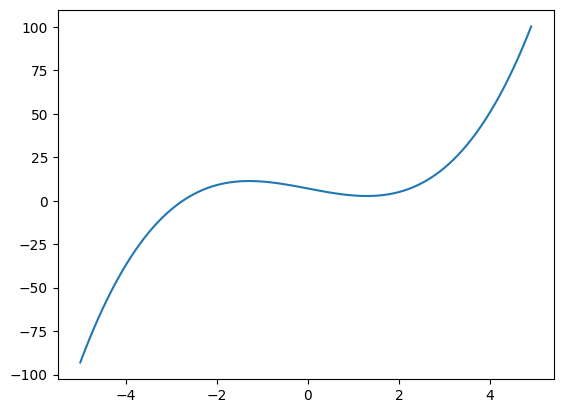

In [20]:
plt.plot(x_range, f(x_range))

In [21]:
def diff_f_x(x,h):
  return (f(x+h) - f(x))/h

In [22]:
diff_f_x(-2,0.00001)

6.999940000085302

In [23]:
a = 2.0
b = -3.0
c = 10.0

def g(a,b,c):
  return a*b + c

In [24]:
h = 0.0001
diff_g_a = (g(a+h,b,c) - g(a,b,c))/h
diff_g_b = (g(a,b+h,c) - g(a,b,c))/h
diff_g_c = (g(a,b,c+h) - g(a,b,c))/h

In [25]:
print(diff_g_a)
print(diff_g_b)
print(diff_g_c)

-3.000000000010772
2.0000000000042206
0.9999999999976694


# **This is where start building micrograd!**

In [26]:
from graphviz import Digraph
def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if not v in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child,v))
        build(child)
  build(root)
  return nodes, edges

def draw_graph(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)

  for n in nodes:
    uid = str(id(n))
    dot.node (name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')

    if n._op:
      dot.node (name = uid + n._op, label = n._op, shape = 'oval')
      dot.edge(uid+n._op, uid)

  for e in edges:
    dot.edge(str(id(e[0])), str(id(e[1]))+e[1]._op)

  return dot

DOING BIG BACKPROP
Value(data=7.38905609893065,label=)
Value(data=2.0,label=a)


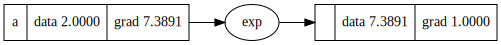

In [44]:
import operator


class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = list(_children)
        self._op = _op
        self.label = label
        self._backward = lambda: None
        # gradient w.r.t to the final output, not just it's parent

    def __repr__(self):
        return f"Value(data={self.data},label={self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            print ("GOING BACKWARD ADDITION.")
            print (self)

            self.grad += out.grad
            other.grad += out.grad

            print(self.grad)
            print(other.grad)

        out._backward = _backward

        return out

    def __radd__(self, other):
        return self.__add__(other)

    def __mul__(self, other):
      other = other if isinstance(other, Value) else Value(other)
      out = Value(self.data * other.data, (self, other), '*')

      def _backward():
          print ("GOING BACKWARD MULT.")
          print (self)
          self.grad += other.data * out.grad
          other.grad += self.data * out.grad
      out._backward = _backward

      return out

    def __rmul__(self, other):
        return self.__mul__(other)

    def __pow__(self, other):
      assert isinstance(other, (int, float)), "only supporting int/float powers for now"
      out = Value(self.data**other, (self,), f'**{other}')

      def _backward():
          self.grad += (other * self.data**(other-1)) * out.grad
      out._backward = _backward

      return out

    def __neg__(self): # -self
      return self * -1

    def __sub__(self,other):
      return self + (-other)

    def __rsub__(self,other):
      return (-self) + other

    def __truediv__(self,other):
      return self * (other ** -1)

    def __rtruediv__(self,other):
      return other * (self ** -1)

    def tanh(self):
      out = Value((math.exp(2*self.data) - 1) / (math.exp(2*self.data) + 1), _children= (self,), _op='tanh')

      def _backward():
          self.grad += (1 - (out.data**2))* out.grad
      out._backward = _backward

      return out

    def exp(self):
      out = Value((math.exp(self.data)), _children= (self,), _op='exp')

      def _backward():
          self.grad += (out.data) * out.grad
      out._backward = _backward

      return out

    def build_reverse_topo_graph(self):
      topo = []
      visited = set()
      def build_topo_recurr(v):
        if v not in visited:
          visited.add(v)
          for i in v._prev:
            build_topo_recurr(i)
          topo.append(v)
      build_topo_recurr(self)
      return reversed(topo)

    def backward(self):
      self.grad = 1.0
      nodes = self.build_reverse_topo_graph()
      # print(list(nodes))
      for i in nodes:
        print(i)
        i._backward()


a = Value(2.0, label='a')
b = a.exp()
# b = a.tanh(); b.label = 'o'
b.backward()
draw_graph(b)

DOING BIG BACKPROP
Value(data=0.7071067811817758,label=o)
GOING BACKWARD TANH.
Value(data=0.8813735870099997,label=n)
GOING BACKWARD ADDITION.
Value(data=-6.0,label=x1*w1 + x2*w2)
0.5000000000067482
0.5000000000067482
Value(data=6.88137358701,label=b)
Value(data=-6.0,label=x1*w1 + x2*w2)
GOING BACKWARD ADDITION.
Value(data=-6.0,label=x1w1)
0.5000000000067482
0.5000000000067482
Value(data=0.0,label=x2w2)
GOING BACKWARD MULT.
Value(data=0.0,label=x2)
Value(data=1.0,label=w2)
Value(data=0.0,label=x2)
Value(data=-6.0,label=x1w1)
GOING BACKWARD MULT.
Value(data=2.0,label=x1)
Value(data=-3.0,label=w1)
Value(data=2.0,label=x1)


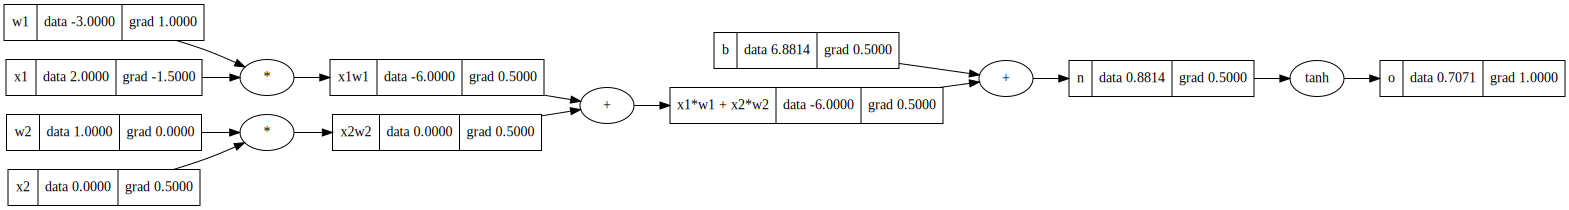

In [15]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')


w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137358701, label='b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1plusx2w2 = x1w1+x2w2; x1w1plusx2w2.label = 'x1*w1 + x2*w2'
n = x1w1plusx2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

o.backward()
draw_graph(o)


Now let's start with neurons!